In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error

## Download fuel consumption dataset "FuelConsumption.csv", which contains modelspecific fuel consumption ratings and estimated carbon dioxide emissions. 
### • Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to Engine size.
### • split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.
### • Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
df[features]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


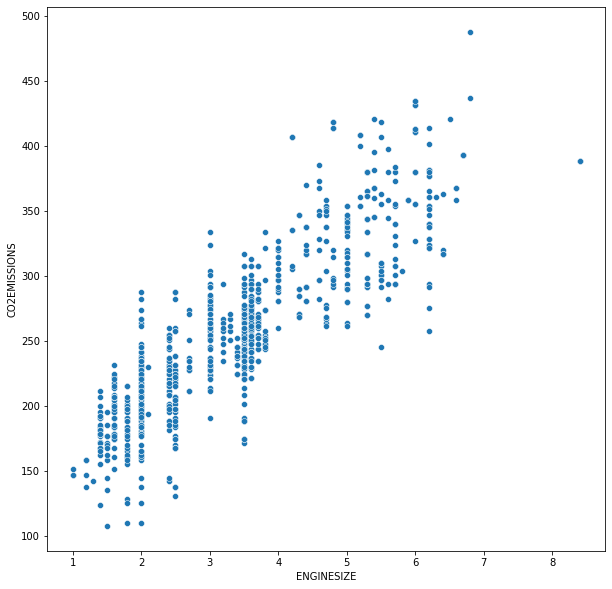

In [4]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = df['ENGINESIZE'], y = df['CO2EMISSIONS'])

In [5]:
x = df[features].drop(columns = 'CO2EMISSIONS')
y = df['CO2EMISSIONS']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [6]:
model = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression(fit_intercept = False))
model.fit(train_x, train_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [7]:
model.score(test_x, test_y)

0.9407945298001292

In [8]:
pred_y = model.predict(test_x)

In [9]:
np.average(cross_val_score(model, train_x, train_y, cv = 10))

0.9012085295193444

In [10]:
mean_absolute_error(pred_y, test_y)

8.25044131175751

In [11]:
r2_score(pred_y, test_y)

0.936500462294497

In [ ]:
for i in [2,3,4,5]:
    poly_features = PolynomialFeatures(degree = i, include_bias = True)
    new_X_train = poly_features.fit_transform(train_x)
    new_X_test = poly_features.transform(test_x)
    
    # creating a model
    LinReg_model = LinearRegression()
    LinReg_model.fit(new_X_train, train_y)
    
    # storing predictions and metric values for degree i
    
    test_preds[i] = LinReg_model.predict(new_X_test)
    
    test_mae[i] = mean_absolute_error(test_preds[i], test_y)
    
    test_mse[i] = mean_squared_error(test_preds[i], test_y)
    
    test_r2[i] = r2_score(test_preds[i], test_y)
    
    test_rss[i] = ((test_preds[i]-test_y)**2).sum()
    
    # printing the results we have gotten for each degree i
    print(f"Degree: {i}",
         f"Mean Absolute Error: {test_mae[i]}",
         f"Mean Squared Error: {test_mse[i]}",
         f"R2 score: {test_r2[i]}",
         f"Residual Sum of Squares: {test_rss[i]}",
         "",
         sep = '\n')

Degree: 2
Mean Absolute Error: 10.471619938642265
Mean Squared Error: 324.62801119383414
R2 score: 0.9093213877554921
Residual Sum of Squares: 104205.59159322076

Degree: 3
Mean Absolute Error: 10.230711579368922
Mean Squared Error: 273.2797687958407
R2 score: 0.929401292287786
Residual Sum of Squares: 87722.80578346486

Degree: 4
Mean Absolute Error: 9.645980775541977
Mean Squared Error: 258.4193096065872
R2 score: 0.9287337805986516
Residual Sum of Squares: 82952.59838371449

Degree: 5
Mean Absolute Error: 8.255203275851372
Mean Squared Error: 231.45533919421595
R2 score: 0.9394227808346743
Residual Sum of Squares: 74297.16388134332



#### After testing with degrees 2,3,4,5, we have come to the conclusion that polynomial of degree 5 has the best R2 score which does not overfit.